## Figure 11 Ablation Study
### Preparation
Change the `res_path` variable to the path of simulator results

In [1]:
res_path = '../../../simulator/example_sim_results/'

### Ablation Study for Focus
Show how much Focus SEC and SIC contribute to speedup.


Speedup Analysis (Geomean):
--------------------------------------------------
CMC to Systolic Array: 2.000x
Focus SEC to CMC: 1.576x
Focus SIC+SEC to Focus SEC: 1.436x
--------------------------------------------------


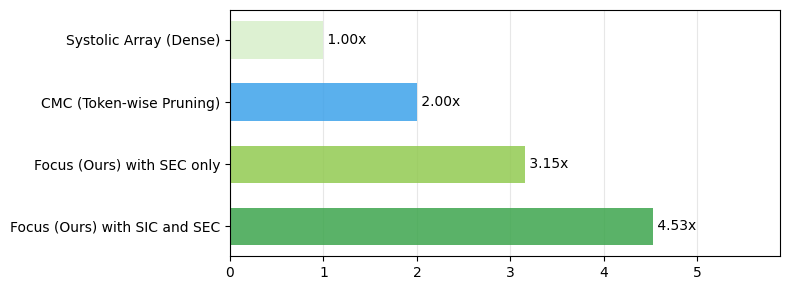

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_dense = pd.read_csv(f'{res_path}/main_dense.csv')
df_cmc = pd.read_csv(f'{res_path}/main_cmc.csv')
df_focus_sec = pd.read_csv(f'{res_path}/main_focus_SEC_only.csv')
df_focus = pd.read_csv(f'{res_path}/main_focus.csv')


datasets = ['videomme', 'mlvu', 'mvbench']
model = 'llava_vid'

dense_times = df_dense[(df_dense['model'] == model) & (df_dense['dataset'].isin(datasets))]['execution_time']
cmc_times = df_cmc[(df_cmc['model'] == model) & (df_cmc['dataset'].isin(datasets))]['execution_time']
focus_sec_times = df_focus_sec[(df_focus_sec['model'] == model) & (df_focus_sec['dataset'].isin(datasets))]['execution_time']
focus_times = df_focus[(df_focus['model'] == model) & (df_focus['dataset'].isin(datasets))]['execution_time']

mean_dense = np.exp(np.mean(np.log(dense_times)))
mean_cmc = np.exp(np.mean(np.log(cmc_times)))
mean_focus_sec = np.exp(np.mean(np.log(focus_sec_times)))
mean_focus = np.exp(np.mean(np.log(focus_times)))

dense_norm = mean_dense / mean_dense  # 1.00
cmc_norm = mean_dense / mean_cmc
focus_sec_norm = mean_dense / mean_focus_sec
focus_norm = mean_dense / mean_focus

fig, ax = plt.subplots(figsize=(8, 3))
methods = ['Focus (Ours) with SIC and SEC', 
           'Focus (Ours) with SEC only',
           'CMC (Token-wise Pruning)', 
           'Systolic Array (Dense)',]
values = [focus_norm, focus_sec_norm, cmc_norm, dense_norm]
colors = [ '#3da54d', '#92ca51', '#3da2ea','#d8efcb']

bars = ax.barh(methods, values, color=colors, height=0.6, alpha=0.85)

for i, (bar, value) in enumerate(zip(bars, values)):
    ax.text(value, i, f' {value:.2f}x', va='center', ha='left', fontsize=10)

ax.set_xlim(0, max(values) * 1.3)
ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)

# Print speedup values
print("\nSpeedup Analysis (Geomean):")
print("-" * 50)
speedup_cmc_to_systolic = cmc_norm  # mean_dense / mean_cmc
print(f"CMC to Systolic Array: {speedup_cmc_to_systolic:.3f}x")

speedup_focus_sec_to_cmc = mean_cmc / mean_focus_sec
print(f"Focus SEC to CMC: {speedup_focus_sec_to_cmc:.3f}x")

speedup_focus_sic_sec_to_focus_sec = mean_focus_sec / mean_focus
print(f"Focus SIC+SEC to Focus SEC: {speedup_focus_sic_sec_to_focus_sec:.3f}x")
print("-" * 50)

plt.tight_layout()
plt.show()